In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Your own logistic regression model

This time it's your turn to create a logistic regression model. The [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), that we're going to work with, contains diagnostic information about breast cancer. The medical features of individual tumors like size, shape and smoothness were measured. The tumors are labeled as **malignant**(0) or **benign**(1).

In [27]:
data: sklearn.utils.Bunch = load_breast_cancer(as_frame=True)
features: pd.DataFrame = data["data"]
feature_names: np.ndarray = data["feature_names"]
labels: pd.Series = data["target"]
label_names: np.ndarray = data["target_names"]

print(features.columns)
print(labels[15:20])
print(label_names)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int32
['malignant' 'benign']


### Data exploration

Let's have a closer look on the distribution of the data. How many tumors are there in the dataset overall? Also find out how many tumors were classified as malignant and how many as benign. Is this a well balanced dataset or is one kind overrepresented?

Assign the amount of malignant tumors to a variable called `n_malignant` and the amount of benign tumors to a variable `n_benign` to pass the tests in the following test cell.

In [3]:
print(labels.value_counts())

n_malignant: int = labels.value_counts()[0] # Gets the number associated with the index 0, not position 0
n_benign: int = labels.value_counts()[1]


1    357
0    212
Name: target, dtype: int64


In [4]:
# Test cell

assert n_malignant is not None, "n_malignant should be a number"
assert n_benign is not None, "n_benign should be a number"
assert n_malignant == 53*4, f"n_malignant should be {53*4}"
assert n_benign == 119*3, f"n_benign should be {119*3}"

Next we should deal with the features and decide if we have to preprocess them or use them as they are. What are the datatypes of the features? If they are non-numerical we need to convert them to quantify them. Are there any missing values or NaNs(not-a-number)?

Assign the variables `need_to_convert_non_numerical` and `need_to_convert_nan` to `True` or `False` depending on the need to deal with this data type within this dataset to pass the test cell.

In [5]:
features.info()

need_to_convert_non_numerical: bool = False
need_to_convert_nan: bool = False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Test cell

assert (not need_to_convert_non_numerical) and (need_to_convert_non_numerical is not None), "Which column contains non_numerical values? How do you know?"
assert (not need_to_convert_nan) and (need_to_convert_nan is not None), "Which column contains NAN values? How do you know?"

Have a look at a specific column. What is the mean and the standard deviation of the "mean radius" of the tumors?
Can you test if there is a correlation between "mean radius", "mean perimeter" and "mean area"?

Hint: You can access a sub-dataframe of a pandas-dataframe by giving it a list of columns as its index:

```my_subframe = my_dataframe[["column1","column2","column3"]]```

Assign the mean and the standard_deviation of the "mean radius" column to variables called `mean_radius_mean` and `mean_radius_std` to pass the test cell. Also assign a `variable geometry_properties_correlated` to `True` or `False` depending on if you found a the mean radius", "mean perimeter" and "mean area" column to be strongly correlated.

14.127291739894563
3.524048826212078
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64


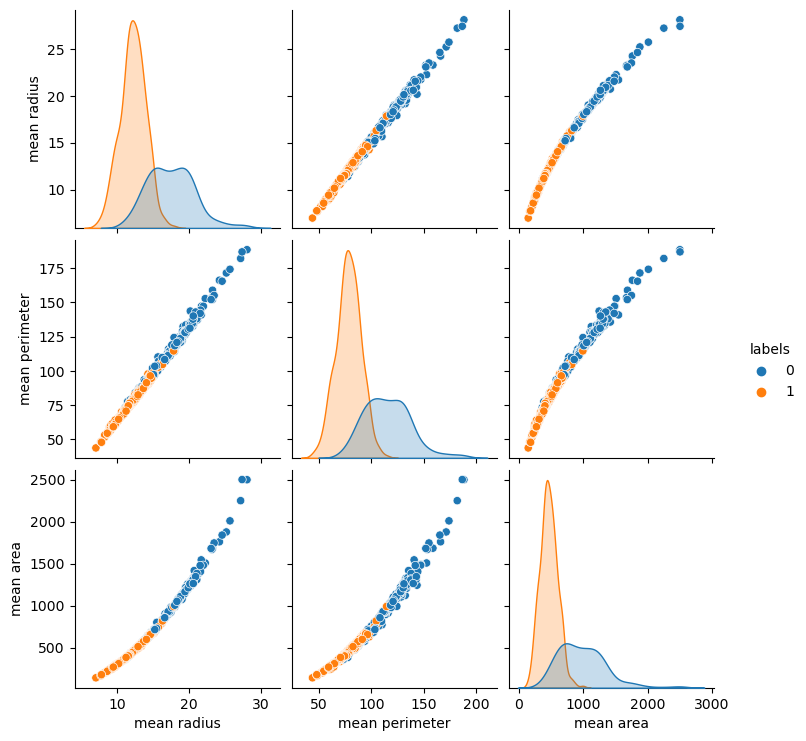

In [29]:
mean_radius_mean: float = features["mean radius"].mean()
mean_radius_std: float = features["mean radius"].std()
print(mean_radius_mean)
print(mean_radius_std)

print(features["mean radius"].describe()) # Alternative quick overview about column properties
test_df: pd.DataFrame = features[["mean radius", "mean perimeter", "mean area"]].copy()
test_df["labels"] = labels # for color difference with hue
sns.pairplot(test_df, hue="labels") # hue not necessary, but interesting
plt.show()

geometry_properties_correlated: bool = True

In [30]:
# Test cell

assert mean_radius_mean is not None, "mean_radius_mean is None. You should calculate it."
assert mean_radius_std is not None, "mean_radius_std is None. You should calculate it."
assert np.isclose(mean_radius_mean*mean_radius_std, 49.785265873530975, rtol=1e-03, atol=1e-04), "One or both of the mean and the std of mean_radius seem to be off. Did you pick the right column?"

assert geometry_properties_correlated, "Why wouldn't radius, diameter and area be correlated?"


## Data preparation

To validate your model in the end you will need a separate test set. Therefore you should split your data in two random subsets for training and testing now. Your test set should contain 15% of your total dataset. Also make sure, that both your subsets have the expected sample size.

Assign features and labels of your subsets to the variables `X_train, X_test, y_train, y_test`. To pass the test cell the sample size and amount of features has to be correct.

In [9]:
X_train: np.ndarray
X_test: np.ndarray
y_train: np.ndarray
y_test: np.ndarray

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(483, 30)
(86, 30)
(483,)
(86,)


In [10]:
# Test cell

assert X_train is not None, "X_train is None. You should assign it the training data."
assert X_test is not None, "X_test is None. You should assign it the test data."
assert y_train is not None, "y_train is None. You should assign it the training labels."
assert y_test is not None, "y_test is None. You should assign it the test labels."

assert y_train.shape == (483,), "Your training set does not contain 85% of the data"
assert y_test.shape == (86,), "Your test set does not contain 15% of the data"

assert X_train.shape[0] == 483, "Your training set does not contain 85% of the data"
assert X_test.shape[0] == 86, "Your test set does not contain 15% of the data"
assert len(X_train.shape) == 2, "Your training set is not a 2D-Matrix"
assert len(X_test.shape) == 2, "Your test set is not a 2D-Matrix"
if (len(X_train.shape) == 2) and (len(X_test.shape) == 2):
    assert X_train.shape == (483, 30), "Your training set does not contain all 30 features of the dataset"
    assert X_test.shape == (86, 30), "Your test set does not contain all 30 features of the dataset"

Standardize the training data and the test data with the mean and the standard deviation of the training data.

Assign the scaled values to variables called `X_train_scaled` and `X_test_scaled`. To pass the test cell the mean and standard deviation of `X_train_scaled` should be very close 0 and 1, while mean and standard deviation of `X_test_scaled` has to have a little deviation from 0 and 1.

In [11]:
scaler: StandardScaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled: np.ndarray = scaler.transform(X_train)
X_test_scaled: np.ndarray = scaler.transform(X_test)

In [12]:
# Test cell

assert X_train_scaled is not None, "X_train_scaled is None. You should assign it the scaled training data."
assert X_test_scaled is not None, "X_test_scaled is None. You should assign it the scaled test data."

assert X_train_scaled.shape == X_train.shape, "X_train_scaled does not have the same shape as X_train"
assert X_test_scaled.shape == X_test.shape, "X_test_scaled does not have the same shape as X_test"

assert np.allclose(X_train_scaled.mean(axis=0), np.zeros(shape=(30,))), "The mean of all columns of X_train_scaled is not close to 0"
assert np.allclose(X_train_scaled.std(axis=0), np.ones(shape=(30,))), "The standard deviation of all columns of X_train_scaled is not close to 0"

assert not np.allclose(X_test_scaled.mean(axis=0), np.zeros(shape=(30,))), "The mean of all columns of X_test_scaled is suspiciously close to 0"
assert not np.allclose(X_test_scaled.std(axis=0), np.ones(shape=(30,))), "The standard deviation of all columns of X_test_scaled is suspiciously close to 0"


## Model training

Now it's finally time to create your LogisticRegression model called `model` and fit it to the data in your training-set.

In [13]:
model: LogisticRegression = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Test cell

assert model is not None, "model is None. You should assign it a Logistic Regression model."
assert isinstance(model, LogisticRegression), "model is not a Logistic Regression model."
assert hasattr(model, "coef_"), "model is not trained. You should train it first."

Make a prediction with the model and save the result to `y_prediction`. Evaluate your model by a metric of your choice.

In [14]:
y_prediction: np.ndarray = model.predict(X_test_scaled)
evaluation: np.ndarray = metrics.accuracy_score(y_test, y_prediction)
print(f"The accuracy on the test set is {metrics.accuracy_score(y_test, y_prediction): .3f}")
print(f"The precision on the test set is {metrics.precision_score(y_test, y_prediction, average='micro'): .3f}")
print(f"The recall on the test set is {metrics.recall_score(y_test, y_prediction, average='micro'): .3f}")
print(f"The f1_score on the test set is {metrics.f1_score(y_test, y_prediction, average='micro'): .3f}")

The accuracy on the test set is  0.953
The precision on the test set is  0.953
The recall on the test set is  0.953
The f1_score on the test set is  0.953


In [ ]:
# Test cell

assert y_prediction is not None, "y_prediction is None. You should assign it the prediction of the test data."
assert evaluation is not None, "evaluation is None. You should assign it to a metric of the model."
assert evaluation > 0.8, "The model is not accurate enough. Try to improve it."
assert evaluation <= 1.0, "The model is too accurate. The evaluatoiion should be less than 1.0"

Finally visualize the results of your prediction in a confusion-matrix. Don't forget, that labels you want to display, are is the list ["malignant", "benign"]. This list still saved in the variable `label_names`.

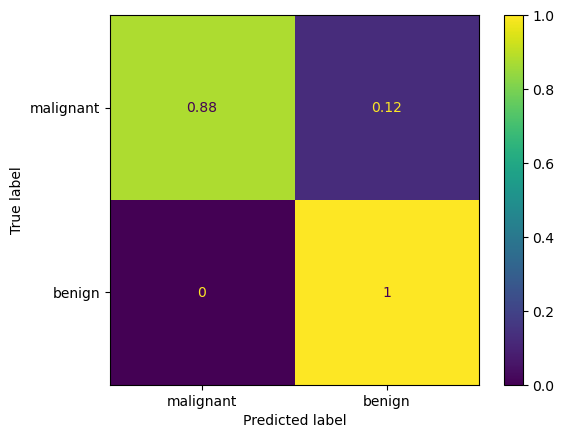

In [15]:
cm: np.ndarray = confusion_matrix(y_test, y_prediction, normalize='true')
disp: ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.show()

Right now we classify the tumors straight up according to which one has the higher probability, the decision-treshold is 0.5, which makes sense in most cases. In other cases we can improve the model by adjusting the decision-threshold, e.g. a tumor has to have a probability of 90% to be classified as benign otherwise we will classify it as malignant. This might even make sense, if it lowers the accuracy of the model, especially in this example. Why?

The next code cell offers a way to play around with different decision thresholds. Call the `test_different_threshholds` function with your variable names and a threshold list of your choice(```my_function(my_argument1, my_argument2,...)```) to have a look at how the threshold affects the prediction outcome.

In [16]:
threshold_list: list = [0.1, 0.3, 0.5, 0.7, 0.9]

def test_different_threshholds(model: LogisticRegression, X_test_scaled: np.ndarray, y_test: np.ndarray, threshold_list: list) -> None:
    pred_proba: np.ndarray = model.predict_proba(X_test_scaled)
    
    for threshold in threshold_list:
        print (f"\n******** For threshold ={threshold: .1f} ******")
        Y_test_pred: np.ndarray = (pred_proba[:,1] > threshold).astype(int)
        test_accuracy: np.ndarray = metrics.accuracy_score(y_test, Y_test_pred)
        print(f"Our testing accuracy is {test_accuracy: .2f}")

        print(confusion_matrix(y_test, Y_test_pred))
        
test_different_threshholds(model, X_test_scaled, y_test, threshold_list)


******** For threshold = 0.1 ******
Our testing accuracy is  0.92
[[25  7]
 [ 0 54]]

******** For threshold = 0.3 ******
Our testing accuracy is  0.94
[[27  5]
 [ 0 54]]

******** For threshold = 0.5 ******
Our testing accuracy is  0.95
[[28  4]
 [ 0 54]]

******** For threshold = 0.7 ******
Our testing accuracy is  0.97
[[30  2]
 [ 1 53]]

******** For threshold = 0.9 ******
Our testing accuracy is  0.93
[[31  1]
 [ 5 49]]


**Congratulations on building your own logistic regression model!**